In [4]:
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split


In [2]:
All_Dropped_NA = pd.read_csv(r"C:Data\GTD_Styled_Data.csv", encoding = 'latin1', low_memory = False)
Grouped_Data_Set_Dropped_NA = pd.read_csv(r"C:Data\Formatted_Year_Data.csv")

# Model 1
######  Controling For Years
###### Dependent Variable - Type of Attack
###### Independent Variable - GDP, Location, Government Type

In [36]:
# https://datascience.stackexchange.com/questions/46905/how-to-add-control-variable-in-regression-using-sklearn
# https://www.andrewvillazon.com/logistic-regression-python-statsmodels/
# https://www.datasklr.com/logistic-regression/multinomial-logistic-regression
# https://investigate.ai/regression/logistic-regression-part-two/

### Attack Type ~ GDP + Region + Government Type (Politcal + Civil Scores) + Years

In [179]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
new_data = All_Dropped_NA[['iyear', 'CL', 'PR', 'region','GDP', 'attacktype1']].dropna()
x = new_data.drop('attacktype1', axis = 1)
y = new_data['attacktype1']
x_train_encoded = pd.get_dummies(x, columns = ['region'])
x_train , x_test, y_train, y_test = train_test_split(x_train_encoded,y, test_size = 0.5, stratify=y)
logit_model = sm.MNLogit(y_train, x_train)

results = logit_model.fit_regularized(method= 'l1')
stats1 = results.summary()
stats2 = results.summary2()
print(stats1)
print(stats2)

Inequality constraints incompatible    (Exit mode 4)
            Current function value: 2.1972245773362227
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1


C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:4247: RuntimeWarning: invalid value encountered in sqrt
  bse = np.sqrt(np.diag(self.cov_params()))


                          MNLogit Regression Results                          
Dep. Variable:            attacktype1   No. Observations:                86752
Model:                        MNLogit   Df Residuals:                    86624
Method:                           MLE   Df Model:                          120
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:                 -0.4961
Time:                        11:03:19   Log-Likelihood:            -1.9061e+05
converged:                      False   LL-Null:                   -1.2741e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
attacktype1=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
iyear                  0      0.001          0      1.000      -0.002       0.002
CL                     0      0.026          0      1.000      -0.050       0.050
PR                     0      0.019     

### Attack Type ~ GDP + Government Type (Political + Civil Scores) + Years

In [180]:
new_data = All_Dropped_NA[['iyear', 'CL', 'PR','GDP', 'attacktype1']].dropna()
x = new_data.drop('attacktype1', axis = 1)
y = new_data['attacktype1']
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, stratify=y)
logit_model = sm.MNLogit(y_train, x_train)
results = logit_model.fit()
stats1 = results.summary()
stats2 = results.summary2()
print(stats1)
print(stats2)

Optimization terminated successfully.
         Current function value: 1.434618
         Iterations 9
                          MNLogit Regression Results                          
Dep. Variable:            attacktype1   No. Observations:                86752
Model:                        MNLogit   Df Residuals:                    86720
Method:                           MLE   Df Model:                           24
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:                 0.02315
Time:                        11:05:03   Log-Likelihood:            -1.2446e+05
converged:                       True   LL-Null:                   -1.2741e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
attacktype1=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
iyear            -0.0002   2.16e-05     -8.129      0.000      -0.000      -0.000
CL                0.

### Attack Type ~ GDP + Region + Years

In [167]:
new_data = All_Dropped_NA[['iyear', 'GDP', 'region', 'attacktype1']].dropna()
x = new_data.drop('attacktype1', axis = 1)
y = new_data['attacktype1']
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, stratify=y)
x_train_encoded = pd.get_dummies(x_train, columns = ['region'])
logit_model = sm.MNLogit(y_train, x_train_encoded)
results = logit_model.fit_regularized(method = 'l1')
stats1 = results.summary()
stats2 = results.summary2()
print(stats1)
print(stats2)

Inequality constraints incompatible    (Exit mode 4)
            Current function value: 2.1972245773362227
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1


C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          MNLogit Regression Results                          
Dep. Variable:            attacktype1   No. Observations:                86752
Model:                        MNLogit   Df Residuals:                    86640
Method:                           MLE   Df Model:                          104
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:                 -0.4961
Time:                        10:42:14   Log-Likelihood:            -1.9061e+05
converged:                      False   LL-Null:                   -1.2741e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
attacktype1=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
iyear                  0      0.002          0      1.000      -0.003       0.003
GDP                    0   1.61e-14          0      1.000   -3.16e-14    3.16e-14
region_1               0      3.155     

### Attack Type ~ Region + Government Type (Political + Civil Scores) + Years

In [181]:
new_data = All_Dropped_NA[['iyear', 'CL', 'PR', 'region', 'attacktype1']].dropna()
x = new_data.drop('attacktype1', axis = 1)
y = new_data['attacktype1']
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, stratify=y)
x_train_encoded = pd.get_dummies(x_train, columns = ['region'])
logit_model = sm.MNLogit(y_train, x_train_encoded)
results = logit_model.fit_regularized(method = 'l1')
stats1 = results.summary()
stats2 = results.summary2()
print(stats1)
print(stats2)

C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2299: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2300: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2331: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2332: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


Iteration limit reached    (Exit mode 9)
            Current function value: 1.394061281929623
            Iterations: 1000
            Function evaluations: 1044
            Gradient evaluations: 1000


C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          MNLogit Regression Results                          
Dep. Variable:            attacktype1   No. Observations:                86752
Model:                        MNLogit   Df Residuals:                    86632
Method:                           MLE   Df Model:                          112
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:                 0.05077
Time:                        11:08:04   Log-Likelihood:            -1.2094e+05
converged:                      False   LL-Null:                   -1.2741e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
attacktype1=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
iyear             0.0128      0.001      9.620      0.000       0.010       0.015
CL               -0.0182      0.022     -0.818      0.414      -0.062       0.025
PR                0.0187      0.017     

### Attack Type ~  Governhment Type (Political + Civil Scores ) + Years

In [182]:
new_data = All_Dropped_NA[['iyear', 'CL', 'PR', 'attacktype1']].dropna()
x = new_data.drop('attacktype1', axis = 1)
y = new_data['attacktype1']
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, stratify=y)
logit_model = sm.MNLogit(y_train, x_train)
results = logit_model.fit()
stats1 = results.summary()
stats2 = results.summary2()
print(stats1)
print(stats2)

Optimization terminated successfully.
         Current function value: 1.443983
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:            attacktype1   No. Observations:                86752
Model:                        MNLogit   Df Residuals:                    86728
Method:                           MLE   Df Model:                           16
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:                 0.01677
Time:                        11:10:42   Log-Likelihood:            -1.2527e+05
converged:                       True   LL-Null:                   -1.2741e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
attacktype1=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
iyear          9.081e-05   1.87e-05      4.865      0.000    5.42e-05       0.000
CL                0.

### Attack Type ~ Governhment Type (Political Scores) + Years

In [174]:
new_data = All_Dropped_NA[['iyear', 'PR', 'attacktype1']].dropna()
x = new_data.drop('attacktype1', axis = 1)
y = new_data['attacktype1']
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, stratify=y)
logit_model = sm.MNLogit(y_train, x_train)
results = logit_model.fit_regularized(method = 'l1')
stats1 = results.summary()
stats2 = results.summary2()
print(stats1)
print(stats2)

C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2299: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2300: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2331: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2332: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.4505089260405228
            Iterations: 52
            Function evaluations: 95
            Gradient evaluations: 52
                          MNLogit Regression Results                          
Dep. Variable:            attacktype1   No. Observations:                86752
Model:                        MNLogit   Df Residuals:                    86736
Method:                           MLE   Df Model:                            8
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:                 0.01233
Time:                        10:54:40   Log-Likelihood:            -1.2583e+05
converged:                       True   LL-Null:                   -1.2741e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
attacktype1=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

### Attack Type ~ Governhment Type (Civil Scores) + Years

In [175]:
new_data = All_Dropped_NA[['iyear', 'CL', 'attacktype1']].dropna()
x = new_data.drop('attacktype1', axis = 1)
y = new_data['attacktype1']
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, stratify=y)
logit_model = sm.MNLogit(y_train, x_train)
results = logit_model.fit()
stats1 = results.summary()
stats2 = results.summary2()
print(stats1)
print(stats2)

C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2299: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2300: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2331: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2332: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.4435962454995857
            Iterations: 54
            Function evaluations: 98
            Gradient evaluations: 54
                          MNLogit Regression Results                          
Dep. Variable:            attacktype1   No. Observations:                86752
Model:                        MNLogit   Df Residuals:                    86736
Method:                           MLE   Df Model:                            8
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:                 0.01704
Time:                        10:56:18   Log-Likelihood:            -1.2523e+05
converged:                       True   LL-Null:                   -1.2741e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
attacktype1=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

### Attack Type ~  Years

In [178]:
new_data = All_Dropped_NA[['iyear', 'attacktype1']].dropna()
x = new_data.drop('attacktype1', axis = 1)
y = new_data['attacktype1']
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, stratify=y)
logit_model = sm.MNLogit(y_train, x_train)
results = logit_model.fit_regularized()
stats1 = results.summary()
stats2 = results.summary2()
print(stats1)
print(stats2)

C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2299: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2300: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2331: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2332: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.468217984778001
            Iterations: 18
            Function evaluations: 62
            Gradient evaluations: 18
                          MNLogit Regression Results                          
Dep. Variable:            attacktype1   No. Observations:                86752
Model:                        MNLogit   Df Residuals:                    86744
Method:                           MLE   Df Model:                            0
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:               0.0002809
Time:                        11:00:03   Log-Likelihood:            -1.2737e+05
converged:                       True   LL-Null:                   -1.2741e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
attacktype1=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

# Model 2
###### Controlling for Years
###### Dependent Variable - GDP
###### Independent Variable - Number of Attacks , Number Number of Deaths

### GDP ~ Number of Attacks + Number of Deaths + Total Rating + Year

In [16]:
y = Grouped_Data_Set_Dropped_NA['GDP']
x = Grouped_Data_Set_Dropped_NA[['Number of Attacks', 'Number of Deaths', 'Total Rating']]
y_train = Grouped_Data_Set_Dropped_NA['GDP']
x_train = Grouped_Data_Set_Dropped_NA[['Number of Attacks', 'Number of Deaths', 'Total Rating', 'Years']]
#x_train_encoded = pd.get_dummies(x, columns = ['region'])
data = pd.concat([y_train, x_train], axis = 1)
x_train_Numeric_encoded = x_train.apply(pd.to_numeric)
y_train_int = y_train.apply(pd.to_numeric)
logit_model = sm.OLS(y_train, x_train)
result=logit_model.fit( maxiter=5000)
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

                                 OLS Regression Results                                
Dep. Variable:                    GDP   R-squared (uncentered):                   0.112
Model:                            OLS   Adj. R-squared (uncentered):              0.111
Method:                 Least Squares   F-statistic:                              100.6
Date:                Tue, 19 Apr 2022   Prob (F-statistic):                    1.01e-80
Time:                        16:19:45   Log-Likelihood:                         -93545.
No. Observations:                3178   AIC:                                  1.871e+05
Df Residuals:                    3174   BIC:                                  1.871e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### GDP ~ Number of Attacks + Number of Deaths + Years

In [18]:
y_train = Grouped_Data_Set_Dropped_NA['GDP']
x_train = Grouped_Data_Set_Dropped_NA[['Number of Attacks', 'Number of Deaths', 'Years']]
#x_train_encoded = pd.get_dummies(x, columns = ['region'])
data = pd.concat([y_train, x_train], axis = 1)
x_train_Numeric_encoded = x_train.apply(pd.to_numeric)
y_train_int = y_train.apply(pd.to_numeric)
logit_model = sm.OLS(y_train, x_train)
result=logit_model.fit( maxiter=5000)
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

                                 OLS Regression Results                                
Dep. Variable:                    GDP   R-squared (uncentered):                   0.075
Model:                            OLS   Adj. R-squared (uncentered):              0.074
Method:                 Least Squares   F-statistic:                              85.92
Date:                Tue, 19 Apr 2022   Prob (F-statistic):                    1.89e-53
Time:                        16:21:16   Log-Likelihood:                         -93611.
No. Observations:                3178   AIC:                                  1.872e+05
Df Residuals:                    3175   BIC:                                  1.872e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### GDP ~ Number of Attacks + Years

In [19]:
y_train = Grouped_Data_Set_Dropped_NA['GDP']
x_train = Grouped_Data_Set_Dropped_NA[['Number of Attacks', 'Years']]
#x_train_encoded = pd.get_dummies(x, columns = ['region'])
data = pd.concat([y_train, x_train], axis = 1)
x_train_Numeric_encoded = x_train.apply(pd.to_numeric)
y_train_int = y_train.apply(pd.to_numeric)
logit_model = sm.OLS(y_train, x_train)
result=logit_model.fit( maxiter=5000)
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

                                 OLS Regression Results                                
Dep. Variable:                    GDP   R-squared (uncentered):                   0.075
Model:                            OLS   Adj. R-squared (uncentered):              0.074
Method:                 Least Squares   F-statistic:                              127.9
Date:                Tue, 19 Apr 2022   Prob (F-statistic):                    3.89e-54
Time:                        16:21:30   Log-Likelihood:                         -93612.
No. Observations:                3178   AIC:                                  1.872e+05
Df Residuals:                    3176   BIC:                                  1.872e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### GDP ~ Number of Deaths + Years

In [21]:
y_train = Grouped_Data_Set_Dropped_NA['GDP']
x_train = Grouped_Data_Set_Dropped_NA[['Number of Deaths', 'Years']]
#x_train_encoded = pd.get_dummies(x, columns = ['region'])
data = pd.concat([y_train, x_train], axis = 1)
x_train_Numeric_encoded = x_train.apply(pd.to_numeric)
y_train_int = y_train.apply(pd.to_numeric)
logit_model = sm.OLS(y_train, x_train)
result=logit_model.fit( maxiter=5000)
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

                                 OLS Regression Results                                
Dep. Variable:                    GDP   R-squared (uncentered):                   0.075
Model:                            OLS   Adj. R-squared (uncentered):              0.074
Method:                 Least Squares   F-statistic:                              127.9
Date:                Tue, 19 Apr 2022   Prob (F-statistic):                    3.71e-54
Time:                        16:21:59   Log-Likelihood:                         -93612.
No. Observations:                3178   AIC:                                  1.872e+05
Df Residuals:                    3176   BIC:                                  1.872e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

### GDP ~ Number of Deaths + Total Score + Years

In [28]:
y_train = Grouped_Data_Set_Dropped_NA['GDP']
x_train = Grouped_Data_Set_Dropped_NA[['Number of Deaths', 'Total Rating', 'Years']]
#x_train_encoded = pd.get_dummies(x, columns = ['region'])
data = pd.concat([y_train, x_train], axis = 1)
x_train_Numeric_encoded = x_train.apply(pd.to_numeric)
y_train_int = y_train.apply(pd.to_numeric)
logit_model = sm.OLS(y_train, x_train)
result=logit_model.fit( maxiter=5000)
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

                                 OLS Regression Results                                
Dep. Variable:                    GDP   R-squared (uncentered):                   0.112
Model:                            OLS   Adj. R-squared (uncentered):              0.111
Method:                 Least Squares   F-statistic:                              133.2
Date:                Tue, 19 Apr 2022   Prob (F-statistic):                    2.75e-81
Time:                        16:25:16   Log-Likelihood:                         -93546.
No. Observations:                3178   AIC:                                  1.871e+05
Df Residuals:                    3175   BIC:                                  1.871e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

### GDP ~ Number of Attacks + Total Score + Years

In [29]:
y_train = Grouped_Data_Set_Dropped_NA['GDP']
x_train = Grouped_Data_Set_Dropped_NA[['Number of Attacks', 'Total Rating', 'Years']]
#x_train_encoded = pd.get_dummies(x, columns = ['region'])
data = pd.concat([y_train, x_train], axis = 1)
x_train_Numeric_encoded = x_train.apply(pd.to_numeric)
y_train_int = y_train.apply(pd.to_numeric)
logit_model = sm.OLS(y_train, x_train)
result=logit_model.fit( maxiter=5000)
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

                                 OLS Regression Results                                
Dep. Variable:                    GDP   R-squared (uncentered):                   0.111
Model:                            OLS   Adj. R-squared (uncentered):              0.111
Method:                 Least Squares   F-statistic:                              132.7
Date:                Tue, 19 Apr 2022   Prob (F-statistic):                    5.36e-81
Time:                        16:25:44   Log-Likelihood:                         -93547.
No. Observations:                3178   AIC:                                  1.871e+05
Df Residuals:                    3175   BIC:                                  1.871e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### GDP ~ Number of Attack + Number of Deaths + Political Score + Civil Score + Years 

In [28]:
y = Grouped_Data_Set_Dropped_NA['GDP']
x = Grouped_Data_Set_Dropped_NA[['Number of Attacks', 'Number of Deaths', 'PR', 'CL']]
y_train = Grouped_Data_Set_Dropped_NA['GDP']
x_train = Grouped_Data_Set_Dropped_NA[['Number of Attacks', 'Number of Deaths', 'PR', 'CL', 'Years']]
#x_train_encoded = pd.get_dummies(x, columns = ['region'])
data = pd.concat([y_train, x_train], axis = 1)
x_train_Numeric_encoded = x_train.apply(pd.to_numeric)
y_train_int = y_train.apply(pd.to_numeric)
logit_model = sm.OLS(y_train, x_train)
result=logit_model.fit( maxiter=5000)
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

                                 OLS Regression Results                                
Dep. Variable:                    GDP   R-squared (uncentered):                   0.119
Model:                            OLS   Adj. R-squared (uncentered):              0.117
Method:                 Least Squares   F-statistic:                              85.63
Date:                Wed, 20 Apr 2022   Prob (F-statistic):                    1.22e-84
Time:                        19:40:35   Log-Likelihood:                         -93534.
No. Observations:                3178   AIC:                                  1.871e+05
Df Residuals:                    3173   BIC:                                  1.871e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### GDP ~ Number of Attack + Number of Deaths + Political Score  + Years 

In [31]:
y = Grouped_Data_Set_Dropped_NA['GDP']
x = Grouped_Data_Set_Dropped_NA[['Number of Attacks', 'Number of Deaths', 'PR']]
y_train = Grouped_Data_Set_Dropped_NA['GDP']
x_train = Grouped_Data_Set_Dropped_NA[['Number of Attacks', 'Number of Deaths', 'PR', 'Years']]
#x_train_encoded = pd.get_dummies(x, columns = ['region'])
data = pd.concat([y_train, x_train], axis = 1)
x_train_Numeric_encoded = x_train.apply(pd.to_numeric)
y_train_int = y_train.apply(pd.to_numeric)
logit_model = sm.OLS(y_train, x_train)
result=logit_model.fit( maxiter=5000)
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

                                 OLS Regression Results                                
Dep. Variable:                    GDP   R-squared (uncentered):                   0.106
Model:                            OLS   Adj. R-squared (uncentered):              0.105
Method:                 Least Squares   F-statistic:                              93.98
Date:                Wed, 20 Apr 2022   Prob (F-statistic):                    1.21e-75
Time:                        19:43:34   Log-Likelihood:                         -93557.
No. Observations:                3178   AIC:                                  1.871e+05
Df Residuals:                    3174   BIC:                                  1.871e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### GDP ~ Number of Attack + Number of Deaths + Civil Liberties  + Years 

In [32]:
y = Grouped_Data_Set_Dropped_NA['GDP']
x = Grouped_Data_Set_Dropped_NA[['Number of Attacks', 'Number of Deaths', 'CL']]
y_train = Grouped_Data_Set_Dropped_NA['GDP']
x_train = Grouped_Data_Set_Dropped_NA[['Number of Attacks', 'Number of Deaths', 'CL', 'Years']]
#x_train_encoded = pd.get_dummies(x, columns = ['region'])
data = pd.concat([y_train, x_train], axis = 1)
x_train_Numeric_encoded = x_train.apply(pd.to_numeric)
y_train_int = y_train.apply(pd.to_numeric)
logit_model = sm.OLS(y_train, x_train)
result=logit_model.fit( maxiter=5000)
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

                                 OLS Regression Results                                
Dep. Variable:                    GDP   R-squared (uncentered):                   0.118
Model:                            OLS   Adj. R-squared (uncentered):              0.116
Method:                 Least Squares   F-statistic:                              105.7
Date:                Wed, 20 Apr 2022   Prob (F-statistic):                    1.31e-84
Time:                        19:44:29   Log-Likelihood:                         -93536.
No. Observations:                3178   AIC:                                  1.871e+05
Df Residuals:                    3174   BIC:                                  1.871e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### GDP ~ Number of Attack + Political Score  + Years 

In [35]:
y = Grouped_Data_Set_Dropped_NA['GDP']
x = Grouped_Data_Set_Dropped_NA[['Number of Attacks', 'PR']]
y_train = Grouped_Data_Set_Dropped_NA['GDP']
x_train = Grouped_Data_Set_Dropped_NA[['Number of Attacks', 'PR', 'Years']]
#x_train_encoded = pd.get_dummies(x, columns = ['region'])
data = pd.concat([y_train, x_train], axis = 1)
x_train_Numeric_encoded = x_train.apply(pd.to_numeric)
y_train_int = y_train.apply(pd.to_numeric)
logit_model = sm.OLS(y_train, x_train)
result=logit_model.fit( maxiter=5000)
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

                                 OLS Regression Results                                
Dep. Variable:                    GDP   R-squared (uncentered):                   0.105
Model:                            OLS   Adj. R-squared (uncentered):              0.104
Method:                 Least Squares   F-statistic:                              123.8
Date:                Wed, 20 Apr 2022   Prob (F-statistic):                    7.74e-76
Time:                        19:45:53   Log-Likelihood:                         -93559.
No. Observations:                3178   AIC:                                  1.871e+05
Df Residuals:                    3175   BIC:                                  1.871e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### GDP ~ Number of Deaths +  Political Score  + Years 

In [36]:
y = Grouped_Data_Set_Dropped_NA['GDP']
x = Grouped_Data_Set_Dropped_NA[['Number of Deaths', 'PR']]
y_train = Grouped_Data_Set_Dropped_NA['GDP']
x_train = Grouped_Data_Set_Dropped_NA[['Number of Deaths', 'PR', 'Years']]
#x_train_encoded = pd.get_dummies(x, columns = ['region'])
data = pd.concat([y_train, x_train], axis = 1)
x_train_Numeric_encoded = x_train.apply(pd.to_numeric)
y_train_int = y_train.apply(pd.to_numeric)
logit_model = sm.OLS(y_train, x_train)
result=logit_model.fit( maxiter=5000)
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

                                 OLS Regression Results                                
Dep. Variable:                    GDP   R-squared (uncentered):                   0.105
Model:                            OLS   Adj. R-squared (uncentered):              0.104
Method:                 Least Squares   F-statistic:                              124.2
Date:                Wed, 20 Apr 2022   Prob (F-statistic):                    4.77e-76
Time:                        19:46:28   Log-Likelihood:                         -93558.
No. Observations:                3178   AIC:                                  1.871e+05
Df Residuals:                    3175   BIC:                                  1.871e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

### GDP ~ Number of Attack +  Civil Liberties  + Years 

In [38]:
y = Grouped_Data_Set_Dropped_NA['GDP']
x = Grouped_Data_Set_Dropped_NA[['Number of Attacks', 'CL']]
y_train = Grouped_Data_Set_Dropped_NA['GDP']
x_train = Grouped_Data_Set_Dropped_NA[['Number of Attacks', 'CL', 'Years']]
#x_train_encoded = pd.get_dummies(x, columns = ['region'])
data = pd.concat([y_train, x_train], axis = 1)
x_train_Numeric_encoded = x_train.apply(pd.to_numeric)
y_train_int = y_train.apply(pd.to_numeric)
logit_model = sm.OLS(y_train, x_train)
result=logit_model.fit( maxiter=5000)
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

                                 OLS Regression Results                                
Dep. Variable:                    GDP   R-squared (uncentered):                   0.117
Model:                            OLS   Adj. R-squared (uncentered):              0.116
Method:                 Least Squares   F-statistic:                              139.7
Date:                Wed, 20 Apr 2022   Prob (F-statistic):                    5.02e-85
Time:                        19:47:22   Log-Likelihood:                         -93538.
No. Observations:                3178   AIC:                                  1.871e+05
Df Residuals:                    3175   BIC:                                  1.871e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### GDP ~ Number of Deaths +  Civil Liberties  + Years 

In [39]:
y = Grouped_Data_Set_Dropped_NA['GDP']
x = Grouped_Data_Set_Dropped_NA[['Number of Deaths', 'CL']]
y_train = Grouped_Data_Set_Dropped_NA['GDP']
x_train = Grouped_Data_Set_Dropped_NA[['Number of Deaths', 'CL', 'Years']]
#x_train_encoded = pd.get_dummies(x, columns = ['region'])
data = pd.concat([y_train, x_train], axis = 1)
x_train_Numeric_encoded = x_train.apply(pd.to_numeric)
y_train_int = y_train.apply(pd.to_numeric)
logit_model = sm.OLS(y_train, x_train)
result=logit_model.fit( maxiter=5000)
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

                                 OLS Regression Results                                
Dep. Variable:                    GDP   R-squared (uncentered):                   0.117
Model:                            OLS   Adj. R-squared (uncentered):              0.116
Method:                 Least Squares   F-statistic:                              140.3
Date:                Wed, 20 Apr 2022   Prob (F-statistic):                    2.30e-85
Time:                        19:48:04   Log-Likelihood:                         -93537.
No. Observations:                3178   AIC:                                  1.871e+05
Df Residuals:                    3175   BIC:                                  1.871e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

# Model 3
###### Controlling for Years
###### Dependent Variable - Target of Attack
###### Independent Variable - Number of Deaths, Type of Attack

In [ ]:
# https://towardsdatascience.com/l1-and-l2-regularization-explained-874c3b03f668
# https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45
# https://stackoverflow.com/questions/70433026/valueerror-need-covariance-of-parameters-for-computing-unnormalized-covarianc
# https://stats.stackexchange.com/questions/401751/why-do-i-get-nan-for-p-values-while-using-statsmodels-logit-function
# https://www.google.com/search?q=what+solver+is+good+when+using+categorical+variables+statsmodel&client=firefox-b-1-d&channel=nus5&sxsrf=APq-WBvYNZ4gBDpuk366_u5CKFIzpUHcNA%3A1650417266183&ei=cl5fYvXnCufIptQPltCHiA0&ved=0ahUKEwj16Ia3u6H3AhVnpIkEHRboAdEQ4dUDCA0&uact=5&oq=what+solver+is+good+when+using+categorical+variables+statsmodel&gs_lcp=Cgdnd3Mtd2l6EAM6BwgjELADECc6BwgAEEcQsAM6BwghEAoQoAE6BQghEKsCOgUIIRCgAUoECEEYAEoECEYYAFA4WIwPYK8QaAFwAXgAgAGqAYgBwQqSAQMwLjmYAQCgAQHIAQnAAQE&sclient=gws-wiz
# https://stackoverflow.com/questions/31507396/mnlogit-in-statsmodel-returning-nan

### Target Of Attack ~ Number Killed + Attack Type + Year

In [121]:

new_data = All_Dropped_NA[['iyear', 'nkill', 'attacktype1', 'targtype1']].dropna()
x = new_data.drop('targtype1', axis = 1)
y = new_data['targtype1']
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, stratify=y)
x_train_encoded = pd.get_dummies(x_train, columns = ['attacktype1'])

logit_model = sm.MNLogit(y_train, x_train_encoded)
results = logit_model.fit_regularized(method = 'l1')
stats1 = results.summary()
stats2 = results.summary2()
print(stats1)
print(stats2)

C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2299: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2300: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2331: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2332: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.265536390749246
            Iterations: 61
            Function evaluations: 327
            Gradient evaluations: 61
                          MNLogit Regression Results                          
Dep. Variable:              targtype1   No. Observations:                81873
Model:                        MNLogit   Df Residuals:                    81642
Method:                           MLE   Df Model:                          210
Date:                Tue, 19 Apr 2022   Pseudo R-squ.:                 0.02272
Time:                        23:14:08   Log-Likelihood:            -1.8549e+05
converged:                       True   LL-Null:                   -1.8980e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
  targtype1=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

### Target of Attack ~ Number Killed + Year

In [122]:
new_data = All_Dropped_NA[['iyear', 'nkill', 'targtype1']].dropna()
x = new_data.drop('targtype1', axis = 1)
y = new_data['targtype1']
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, stratify=y)

logit_model = sm.MNLogit(y_train, x_train)
results = logit_model.fit_regularized(method = 'l1')
stats1 = results.summary()
stats2 = results.summary2()
print(stats1)
print(stats2)

C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2299: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2300: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2331: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2332: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.2928724319100784
            Iterations: 57
            Function evaluations: 271
            Gradient evaluations: 57
                          MNLogit Regression Results                          
Dep. Variable:              targtype1   No. Observations:                81873
Model:                        MNLogit   Df Residuals:                    81831
Method:                           MLE   Df Model:                           21
Date:                Tue, 19 Apr 2022   Pseudo R-squ.:                 0.01092
Time:                        23:23:03   Log-Likelihood:            -1.8772e+05
converged:                       True   LL-Null:                   -1.8980e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
 targtype1=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

### Target Type ~ Attack Type + Year

In [123]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
new_data = All_Dropped_NA[['iyear', 'attacktype1', 'targtype1']].dropna()
x = new_data.drop('targtype1', axis = 1)
y = new_data['targtype1']
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, stratify=y)
x_train_encoded = pd.get_dummies(x_train, columns = ['attacktype1'])

logit_model = sm.MNLogit(y_train, x_train_encoded)
results = logit_model.fit_regularized(method = 'l1')
stats1 = results.summary()
stats2 = results.summary2()
print(stats1)
print(stats2)

C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2299: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2300: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2331: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2332: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


Iteration limit reached    (Exit mode 9)
            Current function value: 2.162419094711411
            Iterations: 1000
            Function evaluations: 1108
            Gradient evaluations: 1000


C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          MNLogit Regression Results                          
Dep. Variable:              targtype1   No. Observations:                86752
Model:                        MNLogit   Df Residuals:                    86542
Method:                           MLE   Df Model:                          189
Date:                Tue, 19 Apr 2022   Pseudo R-squ.:                 0.06645
Time:                        23:37:31   Log-Likelihood:            -1.8759e+05
converged:                      False   LL-Null:                   -2.0095e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
  targtype1=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
iyear             0.0028      0.001      2.545      0.011       0.001       0.005
attacktype1_1    -3.6466      2.187     -1.667      0.095      -7.933       0.640
attacktype1_2    -5.1207      2.193     

### Target Type ~ Year

In [126]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

new_data = All_Dropped_NA[['targtype1', 'iyear']].dropna()
x = new_data.drop('targtype1', axis = 1)
y = new_data['targtype1']
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, stratify=y)

x_train_Numeric_encoded = x_train.apply(pd.to_numeric)
logit_model = sm.MNLogit(np.asarray(y_train), x_train)
results = logit_model.fit_regularized(method = 'l1')
stats1 = results.summary()
stats2 = results.summary2()
print(stats1)
print(stats2)

C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2299: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2300: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2331: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2332: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.3157280548404935
            Iterations: 36
            Function evaluations: 145
            Gradient evaluations: 36
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                86752
Model:                        MNLogit   Df Residuals:                    86731
Method:                           MLE   Df Model:                            0
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:               0.0002689
Time:                        01:26:20   Log-Likelihood:            -2.0089e+05
converged:                       True   LL-Null:                   -2.0095e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
       y=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

# Model 4
###### Controlling for Years
###### Dependent Variable - Region (Country)
###### Independent Variable - Type of Attack, Target of Attack, Number of Deaths

### Region ~ Type of Attack + Target of Attack + Nkills + Years

In [185]:
new_data = All_Dropped_NA[['iyear', 'region', 'nkill', 'attacktype1', 'targtype1']].dropna()
x = new_data.drop('region', axis = 1)
y = new_data['region']
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, stratify=y)
x_train_encoded = pd.get_dummies(x_train, columns = ['attacktype1', 'targtype1'])

logit_model = sm.MNLogit(y_train, x_train_encoded)
results = logit_model.fit_regularized(method = 'l1')
stats1 = results.summary()
stats2 = results.summary2()
print(stats1)
print(stats2)

C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2299: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2300: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2331: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2332: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.866622697792981
            Iterations: 48
            Function evaluations: 259
            Gradient evaluations: 48


C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:4247: RuntimeWarning: invalid value encountered in sqrt
  bse = np.sqrt(np.diag(self.cov_params()))


                          MNLogit Regression Results                          
Dep. Variable:                 region   No. Observations:                81873
Model:                        MNLogit   Df Residuals:                    81510
Method:                           MLE   Df Model:                          352
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:                 0.03062
Time:                        11:28:47   Log-Likelihood:            -1.5283e+05
converged:                       True   LL-Null:                   -1.5765e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
     region=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
iyear             0.0005      0.003      0.194      0.846      -0.005       0.006
nkill             0.0947      0.011      8.688      0.000       0.073       0.116
attacktype1_1     0.0246        nan     

### Region ~ Type of Attack + Target of Attack + Years

In [5]:
new_data = All_Dropped_NA[['iyear', 'region', 'attacktype1', 'targtype1']].dropna()
x = new_data.drop('region', axis = 1)
y = new_data['region']
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, stratify=y)
x_train_encoded = pd.get_dummies(x_train, columns = ['attacktype1', 'targtype1'])

logit_model = sm.MNLogit(y_train, x_train_encoded)
results = logit_model.fit_regularized(method = 'l1')
stats1 = results.summary()
stats2 = results.summary2()
print(stats1)
print(stats2)

C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2299: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2300: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2331: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2332: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


Iteration limit reached    (Exit mode 9)
            Current function value: 1.6199943571300996
            Iterations: 1000
            Function evaluations: 1060
            Gradient evaluations: 1000


C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:4247: RuntimeWarning: invalid value encountered in sqrt
  bse = np.sqrt(np.diag(self.cov_params()))


                          MNLogit Regression Results                          
Dep. Variable:                 region   No. Observations:                86752
Model:                        MNLogit   Df Residuals:                    86400
Method:                           MLE   Df Model:                          341
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:                  0.1667
Time:                        16:45:27   Log-Likelihood:            -1.4054e+05
converged:                      False   LL-Null:                   -1.6866e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
     region=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
iyear            -0.0652      0.003    -24.278      0.000      -0.070      -0.060
attacktype1_1    88.3569        nan        nan        nan         nan         nan
attacktype1_2    89.1206        nan     

### Region ~ Type of Attack + Years

In [6]:
new_data = All_Dropped_NA[['iyear', 'region', 'attacktype1']].dropna()
x = new_data.drop('region', axis = 1)
y = new_data['region']
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, stratify=y)
x_train_encoded = pd.get_dummies(x_train, columns = ['attacktype1'])

logit_model = sm.MNLogit(y_train, x_train_encoded)
results = logit_model.fit_regularized(method = 'l1')
stats1 = results.summary()
stats2 = results.summary2()
print(stats1)
print(stats2)

C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2299: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2300: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2331: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2332: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


Iteration limit reached    (Exit mode 9)
            Current function value: 1.6528680374360765
            Iterations: 1000
            Function evaluations: 1072
            Gradient evaluations: 1000


C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          MNLogit Regression Results                          
Dep. Variable:                 region   No. Observations:                86752
Model:                        MNLogit   Df Residuals:                    86642
Method:                           MLE   Df Model:                           99
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:                  0.1498
Time:                        16:48:27   Log-Likelihood:            -1.4339e+05
converged:                      False   LL-Null:                   -1.6866e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
     region=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
iyear            -0.0796      0.003    -30.233      0.000      -0.085      -0.074
attacktype1_1   159.7010      5.244     30.453      0.000     149.423     169.979
attacktype1_2   161.1128      5.258     

### Region ~ Target of Attack + Years

In [7]:
new_data = All_Dropped_NA[['iyear', 'region', 'targtype1']].dropna()
x = new_data.drop('region', axis = 1)
y = new_data['region']
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, stratify=y)
x_train_encoded = pd.get_dummies(x_train, columns = ['targtype1'])

logit_model = sm.MNLogit(y_train, x_train_encoded)
results = logit_model.fit_regularized(method = 'l1')
stats1 = results.summary()
stats2 = results.summary2()
print(stats1)
print(stats2)

C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2299: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2300: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2331: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2332: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


Iteration limit reached    (Exit mode 9)
            Current function value: 1.687001449392542
            Iterations: 1000
            Function evaluations: 1060
            Gradient evaluations: 1000


C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:4247: RuntimeWarning: invalid value encountered in sqrt
  bse = np.sqrt(np.diag(self.cov_params()))


                          MNLogit Regression Results                          
Dep. Variable:                 region   No. Observations:                86752
Model:                        MNLogit   Df Residuals:                    86499
Method:                           MLE   Df Model:                          242
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:                  0.1323
Time:                        16:54:11   Log-Likelihood:            -1.4635e+05
converged:                      False   LL-Null:                   -1.6866e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
    region=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
iyear           -0.0579      0.003    -22.574      0.000      -0.063      -0.053
targtype1_1    115.9874      5.123     22.641      0.000     105.946     126.028
targtype1_2    116.7372      5.129     22.75

### Region ~ Number of Killed + Years

In [8]:
new_data = All_Dropped_NA[['iyear', 'region', 'nkill']].dropna()
x = new_data.drop('region', axis = 1)
y = new_data['region']
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, stratify=y)
#x_train_encoded = pd.get_dummies(x_train, columns = ['targtype1'])

logit_model = sm.MNLogit(y_train, x_train)
results = logit_model.fit_regularized(method = 'l1')
stats1 = results.summary()
stats2 = results.summary2()
print(stats1)
print(stats2)

C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2299: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2300: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2331: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2332: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.8998856145774703
            Iterations: 51
            Function evaluations: 229
            Gradient evaluations: 51
                          MNLogit Regression Results                          
Dep. Variable:                 region   No. Observations:                81873
Model:                        MNLogit   Df Residuals:                    81851
Method:                           MLE   Df Model:                           11
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:                 0.01334
Time:                        16:55:27   Log-Likelihood:            -1.5555e+05
converged:                       True   LL-Null:                   -1.5765e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
  region=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

# Model 5
###### Controlling for Years
###### Dependent Variable - Government Score
###### Independent Variable - Number of Deaths, Target Of Attacks, Type of Attack

### Government Total Score ~ Number of Attacks + Number of Deaths + GDP + Years (WITH GROUPED DATA_SET _DROPPED NA)

In [17]:
new_data = Grouped_Data_Set_Dropped_NA[['Number of Attacks','Number of Deaths', 'Total Rating', 'GDP', 'Years']].dropna()
x = new_data.drop('Total Rating', axis = 1)
y = new_data['Total Rating']
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, stratify=y)

logit_model = sm.OLS(y_train, x_train)
results = logit_model.fit()
stats1 = results.summary()
stats2 = results.summary2()
print(stats1)
print(stats2)

                            OLS Regression Results                            
Dep. Variable:           Total Rating   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     25.69
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           3.16e-16
Time:                        18:31:46   Log-Likelihood:                -4365.6
No. Observations:                1589   AIC:                             8739.
Df Residuals:                    1585   BIC:                             8761.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Number of Attacks    -0.0010      0.00

### Government Total Score ~ Number Of Deaths + Target of Attack + Type of Attack + Years

In [11]:
new_data = All_Dropped_NA[['iyear', 'Total Rating', 'nkill', 'attacktype1', 'targtype1']].dropna()
x = new_data.drop('Total Rating', axis = 1)
y = new_data['Total Rating']
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, stratify=y)
x_train_encoded = pd.get_dummies(x_train, columns = ['attacktype1', 'targtype1'])

logit_model = sm.MNLogit(y_train, x_train_encoded)
results = logit_model.fit_regularized(method = 'l1')
stats1 = results.summary()
stats2 = results.summary2()
print(stats1)
print(stats2)

C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2299: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2300: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2331: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2332: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.3188608467230214
            Iterations: 67
            Function evaluations: 367
            Gradient evaluations: 67


C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:4247: RuntimeWarning: invalid value encountered in sqrt
  bse = np.sqrt(np.diag(self.cov_params()))


                          MNLogit Regression Results                          
Dep. Variable:           Total Rating   No. Observations:                81873
Model:                        MNLogit   Df Residuals:                    81477
Method:                           MLE   Df Model:                          384
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:                 0.01689
Time:                        18:28:31   Log-Likelihood:            -1.8985e+05
converged:                       True   LL-Null:                   -1.9311e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
 Total Rating=3       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
iyear            8.312e-05      0.002      0.045      0.964      -0.003       0.004
nkill              -0.3671      0.021    -17.678      0.000      -0.408      -0.326
attacktype1_1       0.0053   2.8

### Government Total Score ~ Number Of Deaths + Type of Attack + Years

In [19]:
new_data = All_Dropped_NA[['iyear', 'Total Rating', 'nkill', 'attacktype1']].dropna()
x = new_data.drop('Total Rating', axis = 1)
y = new_data['Total Rating']
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, stratify=y)
x_train_encoded = pd.get_dummies(x_train, columns = ['attacktype1'])

logit_model = sm.MNLogit(y_train, x_train_encoded)
results = logit_model.fit_regularized(method = 'l1')
stats1 = results.summary()
stats2 = results.summary2()
print(stats1)
print(stats2)

C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2299: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2300: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2331: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2332: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.322847539203737
            Iterations: 58
            Function evaluations: 297
            Gradient evaluations: 58
                          MNLogit Regression Results                          
Dep. Variable:           Total Rating   No. Observations:                81873
Model:                        MNLogit   Df Residuals:                    81741
Method:                           MLE   Df Model:                          120
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:                 0.01520
Time:                        18:38:02   Log-Likelihood:            -1.9018e+05
converged:                       True   LL-Null:                   -1.9311e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
 Total Rating=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

### Government Total Score ~ Number Of Deaths + Target of Attack  + Years

In [25]:
new_data = All_Dropped_NA[['iyear', 'Total Rating', 'nkill', 'targtype1']].dropna()
x = new_data.drop('Total Rating', axis = 1)
y = new_data['Total Rating']
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, stratify=y)
x_train_encoded = pd.get_dummies(x_train, columns = ['targtype1'])

logit_model = sm.MNLogit(y_train, x_train_encoded)
results = logit_model.fit_regularized(method = 'l1')
stats1 = results.summary()
stats2 = results.summary2()
print(stats1)
print(stats2)

C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2299: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2300: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2331: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2332: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.330124196113216
            Iterations: 53
            Function evaluations: 275
            Gradient evaluations: 53
                          MNLogit Regression Results                          
Dep. Variable:           Total Rating   No. Observations:                81873
Model:                        MNLogit   Df Residuals:                    81585
Method:                           MLE   Df Model:                          276
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:                 0.01211
Time:                        19:18:43   Log-Likelihood:            -1.9077e+05
converged:                       True   LL-Null:                   -1.9311e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
 Total Rating=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

In [ ]:

plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(results.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('Government Total Score ~ Number Of Deaths + Target of Attack  + Years.png')

### Government Total Score ~ Number Of Deaths + Years

In [21]:
new_data = All_Dropped_NA[['iyear', 'Total Rating', 'nkill']].dropna()
x = new_data.drop('Total Rating', axis = 1)
y = new_data['Total Rating']
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, stratify=y)

logit_model = sm.MNLogit(y_train, x_train)
results = logit_model.fit_regularized(method = 'l1')
stats1 = results.summary()
stats2 = results.summary2()
print(stats1)
print(stats2)

C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2299: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2300: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2331: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
C:\Users\scott\anaconda3\envs\Data Science\lib\site-packages\statsmodels\discrete\discrete_model.py:2332: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.3350743378481913
            Iterations: 52
            Function evaluations: 264
            Gradient evaluations: 52
                          MNLogit Regression Results                          
Dep. Variable:           Total Rating   No. Observations:                81873
Model:                        MNLogit   Df Residuals:                    81849
Method:                           MLE   Df Model:                           12
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:                 0.01001
Time:                        19:11:43   Log-Likelihood:            -1.9118e+05
converged:                       True   LL-Null:                   -1.9311e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
 Total Rating=3       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

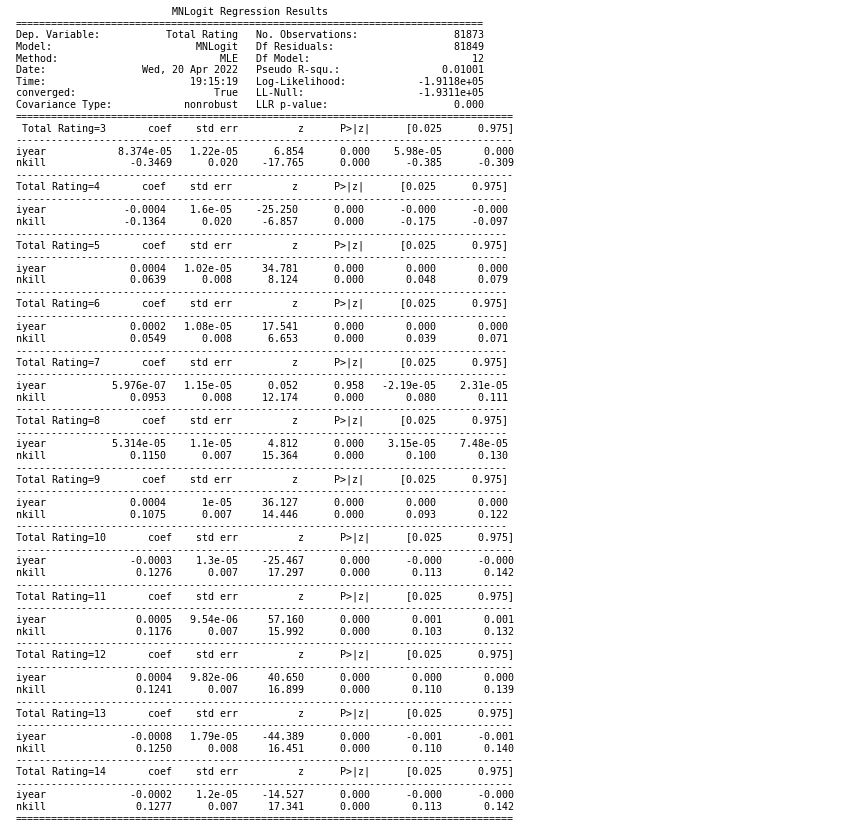

In [24]:

plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(results.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('Government Total Score ~ Number Of Deaths + Years.png')

# Model 6 
###### Controling for Years 

###### Dependent Variables - Gname 

###### Independent Variables - Number of Deaths, Types of Attacks , Target of Attacks , Region, Government Total Score, GDP

### Gname ~ Number of Deaths + Types of Attack + Types of Attack + Region + Government Score + GDP 

In [ ]:
#Encoding the gname

In [183]:
new_data_all = All_Dropped_NA[['iyear', 'attacktype1', "Total Rating", 'GDP', 'nkill', 'gname']].dropna()
new_data = new_data_all[new_data_all.gname != 'Unknown']
new_data.gname = pd.Categorical(new_data.gname)
new_data['gname1'] = new_data.gname.cat.codes


x = new_data.drop(['gname1','gname'], axis = 1)
y = new_data['gname1']
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5)
x_train_encoded = pd.get_dummies(x_train, columns = ['attacktype1'])

logit_model = sm.MNLogit(y_train, x_train_encoded)
results = logit_model.fit_regularized(method = 'l1')
stats1 = results.summary()
stats2 = results.summary2()
print(stats1)
print(stats2)

C:\Users\scott\AppData\Local\Temp/ipykernel_10028/2198375958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.gname = pd.Categorical(new_data.gname)
C:\Users\scott\AppData\Local\Temp/ipykernel_10028/2198375958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['gname1'] = new_data.gname.cat.codes


MemoryError: Unable to allocate 278. GiB for an array with shape (37321417341,) and data type float64